<a href="https://colab.research.google.com/github/erassmirza/ML_termProject/blob/main/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install pycoingecko
from pycoingecko import CoinGeckoAPI

# Coingecko
cg = CoinGeckoAPI()

# Extract Data

def coin_data(coin_name):
  data = cg.get_coin_market_chart_by_id(id=coin_name,
                                   vs_currency='usd',
                                   days = 10000)
  df = pd.DataFrame(data)
  prices = list(df['prices'])
  market_caps = list(df['market_caps'])
  total_volumes = list(df['total_volumes'])

  timestamp = []
  price = []
  market_cap = []
  total_volume = []

  for i in range(len(prices)):
    timestamp.append(prices[i][0])
    price.append(prices[i][1])
    market_cap.append(market_caps[i][1])
    total_volume.append(total_volumes[i][1])

  data = pd.DataFrame([timestamp, price, market_cap, total_volume]).T
  data.rename(columns = {0:'timestamp',
                              1:'price',
                              2:'market_cap',
                              3:'total_volume'}, inplace = True)
  data['timestamp'] = pd.to_datetime(data['timestamp'], unit="ms")

  # coin name
  data['coin_name'] = coin_name

  # Percentage Change
  data['price_change'] = data['price'].pct_change()
  data['market_cap_change'] = data['market_cap'].pct_change()
  data['total_volume_change'] = data['total_volume'].pct_change()

  # Moving Average with period of 2 (current and previous day)
  data['price_ma'] = data['price'].rolling(window=2).mean()

  # Price to market capital ratio
  data['price_to_marketcap'] = data['price'] / data['market_cap']

  # Price to volume ratio
  data['price_to_volume'] = data['price'] / data['total_volume']

  # Market capital to volume ratio
  data['marketcap_to_volume'] = data['market_cap'] / data['total_volume']

  # Weekly/Monthly Return
  data['weekly_return'] = data['price'].pct_change(periods=7)
  data['monthly_return'] = data['price'].pct_change(periods=30)

  # Price percentage change from all-time high
  data['price_pct_change_from_high'] = (data['price'] - data['price'].max()) / data['price'].max()

  # Price percentage change from all-time low
  data['price_pct_change_from_low'] = (data['price'] - data['price'].min()) / data['price'].min()

  return data.to_csv('/content/drive/MyDrive/ML/Term Project/CSVs/'+coin_name+'.csv', index=False)

In [ ]:
# coin_list = pd.DataFrame(cg.get_coins_list())
# coins = coin_list.id.to_list()

coins = ['bitcoin', 'ethereum', 'matic-network', 'solana', 'yearn-finance']
for coin in coins:
  coin_data(coin)

In [ ]:
coins_df = []
for i in range(len(coins)):
  df = pd.read_csv('/content/drive/MyDrive/ML/Term Project/CSVs/'+coins[i]+'.csv')
  coins_df.append(df)

coins_data = pd.concat(coins_df)

In [ ]:
coins_data

,timestamp,price,market_cap,total_volume,coin_name,price_change,market_cap_change,total_volume_change,price_ma,price_to_marketcap,price_to_volume,marketcap_to_volume,weekly_return,monthly_return,price_pct_change_from_high,price_pct_change_from_low
0,2013-04-28 00:00:00.000000000,135.300000,1.500518e+09,0.000000e+00,bitcoin,NaN,NaN,NaN,NaN,9.016889e-08,inf,inf,NaN,NaN,-0.997999,0.995310
1,2013-04-29 00:00:00.000000000,141.960000,1.575032e+09,0.000000e+00,bitcoin,0.049224,0.049659,NaN,138.630000,9.013150e-08,inf,inf,NaN,NaN,-0.997901,1.093527
2,2013-04-30 00:00:00.000000000,135.300000,1.501657e+09,0.000000e+00,bitcoin,-0.046915,-0.046586,NaN,138.630000,9.010044e-08,inf,inf,NaN,NaN,-0.997999,0.995310
3,2013-05-01 00:00:00.000000000,117.000000,1.298952e+09,0.000000e+00,bitcoin,-0.135255,-0.134988,NaN,126.150000,9.007264e-08,inf,inf,NaN,NaN,-0.998270,0.725435
4,2013-05-02 00:00:00.000000000,103.430000,1.148668e+09,0.000000e+00,bitcoin,-0.115983,-0.115696,NaN,110.215000,9.004345e-08,inf,inf,NaN,NaN,-0.998470,0.525314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-07-12 00:00:00,6942.055608,2.295955e+08,1.115793e+07,yearn-finance,-0.013013,-0.010874,-0.255095,6987.820111,3.023603e-05,0.000622,20.576889,-0.009618,0.278966,-0.915414,7.777001
1090,2023-07-13 00:00:00,6928.684434,2.291267e+08,1.183559e+07,yearn-finance,-0.001926,-0.002042,0.060734,6935.370021,3.023953e-05,0.000585,19.359124,0.002875,0.259149,-0.915577,7.760096
1091,2023-07-14 00:00:00,7347.373493,2.422313e+08,2.168183e+07,yearn-finance,0.060428,0.057193,0.831918,7138.028963,3.033206e-05,0.000339,11.172086,0.094285,0.315221,-0.910475,8.289454
1092,2023-07-15 00:00:00,7020.755552,2.318891e+08,2.704554e+07,yearn-finance,-0.044454,-0.042695,0.247383,7184.064522,3.027635e-05,0.000260,8.574025,0.012827,0.302251,-0.914455,7.876503


In [ ]:
coins_data.isnull().sum()

timestamp                       0
price                           0
market_cap                      2
total_volume                    0
coin_name                       0
price_change                    5
market_cap_change               5
total_volume_change           246
price_ma                        5
price_to_marketcap              2
price_to_volume                 0
marketcap_to_volume             2
weekly_return                  35
monthly_return                150
price_pct_change_from_high      0
price_pct_change_from_low       0
dtype: int64

In [ ]:
coins_data.timestamp = pd.to_datetime(coins_data.timestamp.str.slice(0,10))
coins_data.set_index('timestamp', inplace=True)

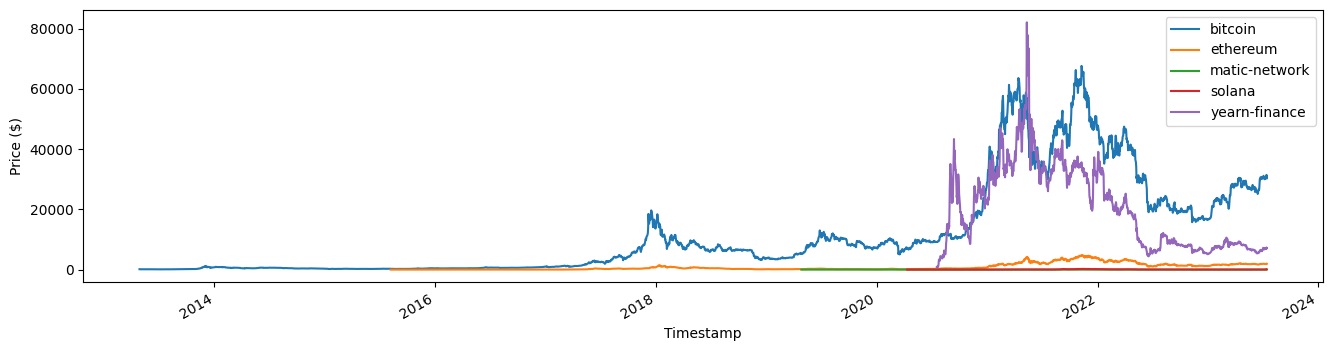

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby(['coin_name'])['price'].plot(rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price ($)')
ax.legend()

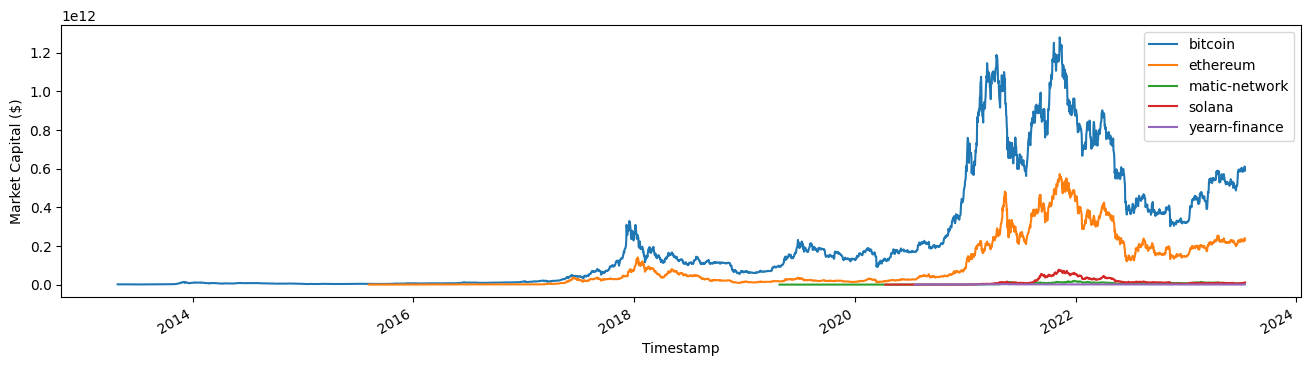

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby(['coin_name'])['market_cap'].plot(rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Market Capital ($)')
ax.legend()

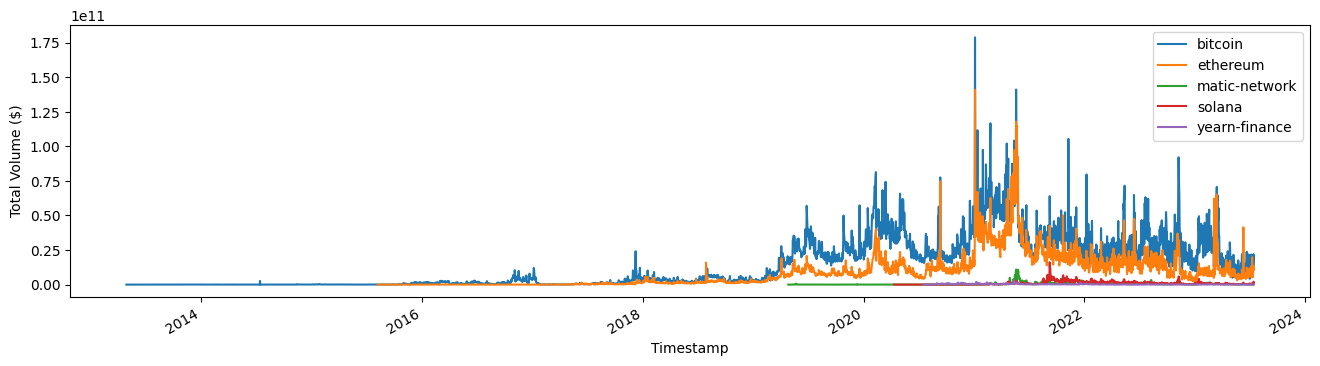

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby(['coin_name'])['total_volume'].plot(rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Total Volume ($)')
ax.legend()

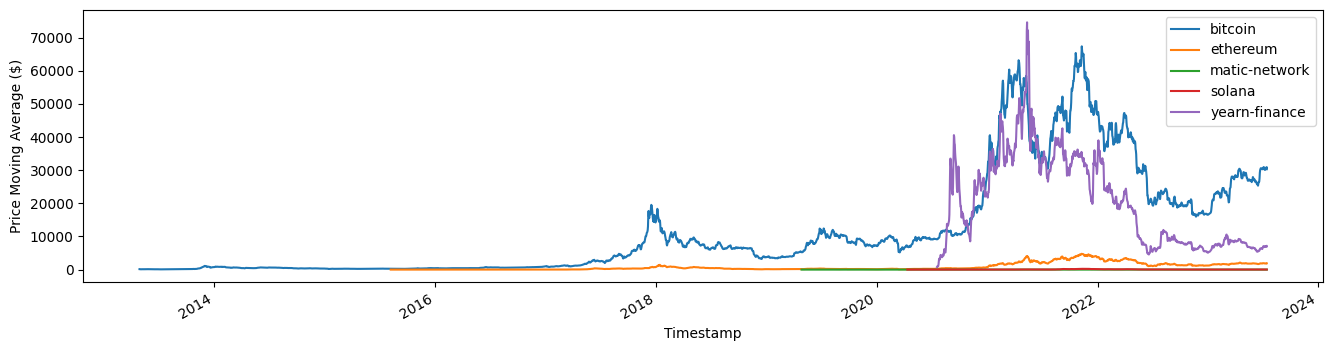

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby('coin_name')['price_ma'].plot(kind = 'line', rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price Moving Average ($)')
ax.legend()

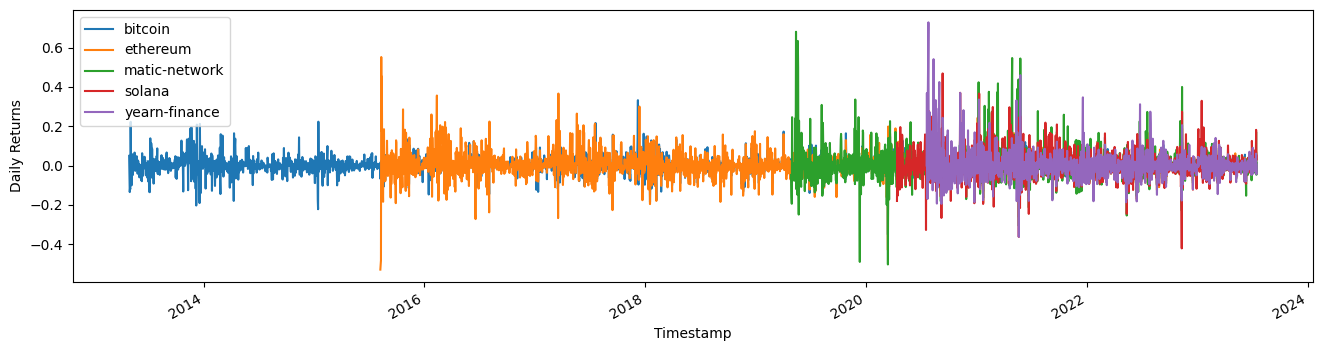

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby('coin_name')['price_change'].plot(kind = 'line', rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Daily Returns')
ax.legend()

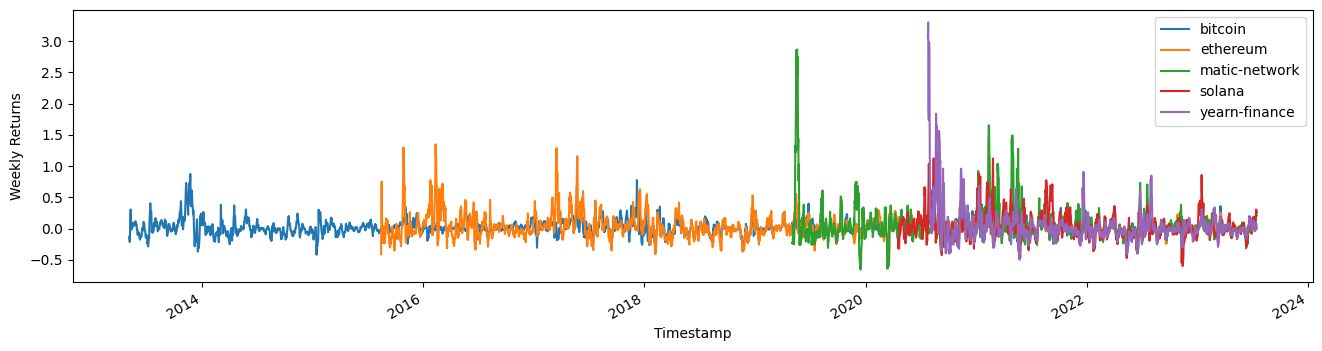

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby('coin_name')['weekly_return'].plot(kind = 'line', rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Weekly Returns')
ax.legend()

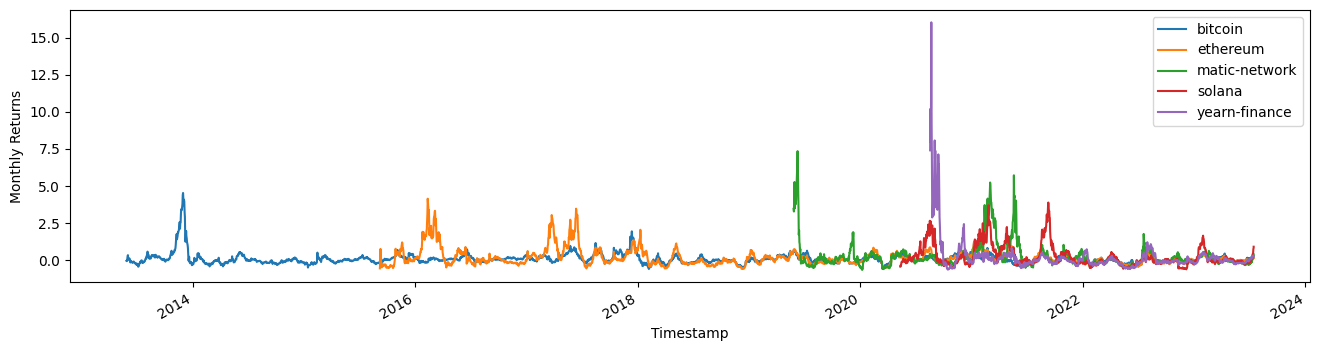

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
coins_data.groupby('coin_name')['monthly_return'].plot(kind = 'line', rot=30, figsize=(16,4))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Monthly Returns')
ax.legend()

# 03 Months Data

In [ ]:
btc = coins_data.price[coins_data.coin_name == 'bitcoin'].tail(90)
btc_return = coins_data.price_change[coins_data.coin_name == 'bitcoin'].tail(90)

eth = coins_data.price[coins_data.coin_name == 'ethereum'].tail(90)
eth_return = coins_data.price_change[coins_data.coin_name == 'ethereum'].tail(90)

matic = coins_data.price[coins_data.coin_name == 'matic-network'].tail(90)
matic_return = coins_data.price_change[coins_data.coin_name == 'matic-network'].tail(90)

sol = coins_data.price[coins_data.coin_name == 'solana'].tail(90)
sol_return = coins_data.price_change[coins_data.coin_name == 'solana'].tail(90)

yfi = coins_data.price[coins_data.coin_name == 'yearn-finance'].tail(90)
yfi_return = coins_data.price_change[coins_data.coin_name == 'yearn-finance'].tail(90)

coins_df = pd.concat([btc, btc_return, eth, eth_return, matic, matic_return, sol, sol_return, yfi, yfi_return],
                     keys = ['btc', 'btc_return', 'eth', 'eth_return', 'matic', 'matic_return', 'sol', 'sol_return', 'yfi', 'yfi_return'],
                     axis=1)
coins_df

,btc,btc_return,eth,eth_return,matic,matic_return,sol,sol_return,yfi,yfi_return
timestamp,,,,,,,,,,
2023-04-18,29467.459829,-0.027631,2077.535665,-0.019382,1.154723,-0.024786,24.582472,-0.028198,8950.570476,-0.028509
2023-04-19,30365.904168,0.030489,2103.278814,0.012391,1.171402,0.014443,24.828832,0.010022,9070.957043,0.013450
2023-04-20,28833.217501,-0.050474,1936.425921,-0.079330,1.084252,-0.074398,22.669218,-0.086980,8396.231505,-0.074383
2023-04-21,28255.578249,-0.020034,1943.435598,0.003620,1.047042,-0.034318,22.178785,-0.021634,8270.168641,-0.015014
2023-04-22,27300.157129,-0.033814,1850.149738,-0.048000,1.012913,-0.032595,21.256330,-0.041592,8230.988337,-0.004738
...,...,...,...,...,...,...,...,...,...,...
2023-07-12,30620.814247,0.007453,1878.233708,-0.001068,0.741451,0.007706,22.068234,0.035939,6942.055608,-0.013013
2023-07-13,30407.416314,-0.006969,1873.506815,-0.002517,0.724706,-0.022585,21.997628,-0.003199,6928.684434,-0.001926
2023-07-14,31446.014971,0.034156,2003.253616,0.069253,0.848912,0.171388,25.990368,0.181508,7347.373493,0.060428


In [ ]:
coins_df[['btc_return', 'eth_return', 'matic_return', 'sol_return', 'yfi_return']].mean() * 100

btc_return      0.023158
eth_return     -0.075423
matic_return   -0.332955
sol_return      0.200415
yfi_return     -0.249017
dtype: float64

In [ ]:
coins_df[['btc_return', 'eth_return', 'matic_return', 'sol_return', 'yfi_return']].var()

btc_return      0.000471
eth_return      0.000562
matic_return    0.001541
sol_return      0.001756
yfi_return      0.000945
dtype: float64

In [ ]:
coins_df[['btc_return', 'eth_return', 'matic_return', 'sol_return', 'yfi_return']].cov()

,btc_return,eth_return,matic_return,sol_return,yfi_return
btc_return,0.000471,0.000442,0.000541,0.000566,0.000458
eth_return,0.000442,0.000562,0.000682,0.000692,0.000549
matic_return,0.000541,0.000682,0.001541,0.001220,0.000820
sol_return,0.000566,0.000692,0.001220,0.001756,0.000892
yfi_return,0.000458,0.000549,0.000820,0.000892,0.000945


# Portfolio Return

In [ ]:
def calculate_risk_of_return(w1, w2, w3, var1, var2, var3, covar12, covar13, covar23):
    risk = w1**2 * var1 + w2**2 * var2 + w3**2 * var3 + 2 * w1 * w2 * covar12 + 2 * w1 * w3 * covar13 + 2 * w2 * w3 * covar23
    return risk

def calculate_portfolio_return(w1, w2, w3, er1, er2, er3):
    portfolio_return = w1 * er1 + w2 * er2 + w3 * er3
    return portfolio_return

def generate_weights(num_coins):
    weights = np.round(np.random.dirichlet(np.ones(num_coins), size=1)[0] * 100)
    return weights

# Example usage
num_coins = 3

# Generate random weights and assign them to columns
weights = generate_weights(num_coins)

## Btc - Eth - Matic

In [ ]:
# Example variances and covariances
variances = coins_df[['btc_return', 'eth_return', 'matic_return']].var().tolist()
covv = coins_df[['btc_return', 'eth_return', 'matic_return']].cov()
covariances = [covv.iloc[0][1], covv.iloc[0][2], covv.iloc[1][2]]

# Calculate the expected returns for each coin (ER1, ER2, ER3)
expected_returns = (coins_df[['btc_return', 'eth_return', 'matic_return']].mean() * 100).to_list()

# Create a new DataFrame to store the results
port_df = pd.DataFrame()

# Iterate over each row in the coin DataFrame
for _, row in coins_df.iterrows():
    # Generate random weights for each row
    weights = generate_weights(num_coins)

    # Calculate the risk of return for the row
    risk = calculate_risk_of_return(weights[0], weights[1], weights[2], variances[0], variances[1], variances[2],
                                   covariances[0], covariances[1], covariances[2])

    # Calculate the portfolio return for the row
    portfolio_return = calculate_portfolio_return(weights[0], weights[1], weights[2], expected_returns[0],
                                                 expected_returns[1], expected_returns[2])


    # Create a dictionary with the row details and risk of return
    row_dict = {
        'weight1': weights[0],
        'weight2': weights[1],
        'weight3': weights[2],
        'risk_of_return': risk,
        'portfolio_return': portfolio_return
    }

    # Append the row dictionary to the result DataFrame
    port_df = pd.concat([port_df, pd.DataFrame(row_dict, index=[0])], ignore_index=True)

port_df

,weight1,weight2,weight3,risk_of_return,portfolio_return
0,64.0,22.0,14.0,5.139811,-4.838575
1,75.0,20.0,5.0,4.783599,-1.436400
2,9.0,48.0,43.0,7.801294,-17.728948
3,63.0,34.0,3.0,4.772483,-2.104311
4,83.0,5.0,12.0,5.010072,-2.450470
...,...,...,...,...,...
85,32.0,35.0,33.0,6.559138,-12.886268
86,21.0,34.0,45.0,7.720899,-17.061037
87,46.0,17.0,37.0,6.661351,-12.536257
88,59.0,1.0,40.0,6.767799,-12.027296


In [ ]:
print('Risk of Return:', port_df.risk_of_return.mean())
print('Portfolio Return:', port_df.portfolio_return.mean())

Risk of Return: 6.848314494840156
Portfolio Return: -12.0663466905271


## Btc - Eth - Sol

In [ ]:
# Example variances and covariances
variances = coins_df[['btc_return', 'eth_return', 'sol_return']].var().tolist()
covv = coins_df[['btc_return', 'eth_return', 'sol_return']].cov()
covariances = [covv.iloc[0][1], covv.iloc[0][2], covv.iloc[1][2]]

# Calculate the expected returns for each coin (ER1, ER2, ER3)
expected_returns = (coins_df[['btc_return', 'eth_return', 'sol_return']].mean() * 100).to_list()

# Create a new DataFrame to store the results
port_df = pd.DataFrame()

# Iterate over each row in the coin DataFrame
for _, row in coins_df.iterrows():
    # Generate random weights for each row
    weights = generate_weights(num_coins)

    # Calculate the risk of return for the row
    risk = calculate_risk_of_return(weights[0], weights[1], weights[2], variances[0], variances[1], variances[2],
                                   covariances[0], covariances[1], covariances[2])

    # Calculate the portfolio return for the row
    portfolio_return = calculate_portfolio_return(weights[0], weights[1], weights[2], expected_returns[0],
                                                 expected_returns[1], expected_returns[2])


    # Create a dictionary with the row details and risk of return
    row_dict = {
        'weight1': weights[0],
        'weight2': weights[1],
        'weight3': weights[2],
        'risk_of_return': risk,
        'portfolio_return': portfolio_return
    }

    # Append the row dictionary to the result DataFrame
    port_df = pd.concat([port_df, pd.DataFrame(row_dict, index=[0])], ignore_index=True)

port_df

,weight1,weight2,weight3,risk_of_return,portfolio_return
0,67.0,23.0,10.0,5.028948,1.820989
1,79.0,3.0,18.0,5.411446,5.210667
2,96.0,0.0,4.0,4.807830,3.024814
3,26.0,27.0,47.0,8.368374,7.985171
4,49.0,2.0,50.0,8.524931,11.004629
...,...,...,...,...,...
85,22.0,26.0,52.0,9.028832,8.970037
86,82.0,3.0,15.0,5.243283,4.678897
87,51.0,2.0,47.0,8.043393,10.449700
88,4.0,8.0,88.0,15.043519,17.125748


In [ ]:
print('Risk of Return:', port_df.risk_of_return.mean())
print('Portfolio Return:', port_df.portfolio_return.mean())

Risk of Return: 7.815062080495152
Portfolio Return: 5.59232375838099


## Btc - Matic - Sol

In [ ]:
# Example variances and covariances
variances = coins_df[['btc_return', 'matic_return', 'sol_return']].var().tolist()
covv = coins_df[['btc_return', 'matic_return', 'sol_return']].cov()
covariances = [covv.iloc[0][1], covv.iloc[0][2], covv.iloc[1][2]]

# Calculate the expected returns for each coin (ER1, ER2, ER3)
expected_returns = (coins_df[['btc_return', 'matic_return', 'sol_return']].mean() * 100).to_list()

# Create a new DataFrame to store the results
port_df = pd.DataFrame()

# Iterate over each row in the coin DataFrame
for _, row in coins_df.iterrows():
    # Generate random weights for each row
    weights = generate_weights(num_coins)

    # Calculate the risk of return for the row
    risk = calculate_risk_of_return(weights[0], weights[1], weights[2], variances[0], variances[1], variances[2],
                                   covariances[0], covariances[1], covariances[2])

    # Calculate the portfolio return for the row
    portfolio_return = calculate_portfolio_return(weights[0], weights[1], weights[2], expected_returns[0],
                                                 expected_returns[1], expected_returns[2])


    # Create a dictionary with the row details and risk of return
    row_dict = {
        'weight1': weights[0],
        'weight2': weights[1],
        'weight3': weights[2],
        'risk_of_return': risk,
        'portfolio_return': portfolio_return
    }

    # Append the row dictionary to the result DataFrame
    port_df = pd.concat([port_df, pd.DataFrame(row_dict, index=[0])], ignore_index=True)

port_df

,weight1,weight2,weight3,risk_of_return,portfolio_return
0,13.0,37.0,50.0,12.351521,-1.997530
1,1.0,19.0,80.0,15.616409,9.730203
2,26.0,3.0,70.0,11.596082,13.632277
3,8.0,16.0,77.0,14.679483,10.289928
4,35.0,50.0,14.0,8.931757,-13.031401
...,...,...,...,...,...
85,63.0,5.0,32.0,6.723079,6.207446
86,27.0,67.0,5.0,10.234159,-20.680626
87,52.0,44.0,4.0,7.427422,-12.644137
88,49.0,14.0,37.0,7.898383,3.888718


In [ ]:
print('Risk of Return:', port_df.risk_of_return.mean())
print('Portfolio Return:', port_df.portfolio_return.mean())

Risk of Return: 10.642659684031141
Portfolio Return: -4.876367302671188


## Eth - Matic - Sol

In [ ]:
# Example variances and covariances
variances = coins_df[['eth_return', 'matic_return', 'sol_return']].var().tolist()
covv = coins_df[['eth_return', 'matic_return', 'sol_return']].cov()
covariances = [covv.iloc[0][1], covv.iloc[0][2], covv.iloc[1][2]]

# Calculate the expected returns for each coin (ER1, ER2, ER3)
expected_returns = (coins_df[['eth_return', 'matic_return', 'sol_return']].mean() * 100).to_list()

# Create a new DataFrame to store the results
port_df = pd.DataFrame()

# Iterate over each row in the coin DataFrame
for _, row in coins_df.iterrows():
    # Generate random weights for each row
    weights = generate_weights(num_coins)

    # Calculate the risk of return for the row
    risk = calculate_risk_of_return(weights[0], weights[1], weights[2], variances[0], variances[1], variances[2],
                                   covariances[0], covariances[1], covariances[2])

    # Calculate the portfolio return for the row
    portfolio_return = calculate_portfolio_return(weights[0], weights[1], weights[2], expected_returns[0],
                                                 expected_returns[1], expected_returns[2])


    # Create a dictionary with the row details and risk of return
    row_dict = {
        'weight1': weights[0],
        'weight2': weights[1],
        'weight3': weights[2],
        'risk_of_return': risk,
        'portfolio_return': portfolio_return
    }

    # Append the row dictionary to the result DataFrame
    port_df = pd.concat([port_df, pd.DataFrame(row_dict, index=[0])], ignore_index=True)

port_df

,weight1,weight2,weight3,risk_of_return,portfolio_return
0,18.0,33.0,49.0,12.054039,-2.524798
1,16.0,33.0,51.0,12.346702,-1.973122
2,20.0,78.0,2.0,12.174300,-27.078100
3,42.0,30.0,28.0,9.152423,-7.544804
4,79.0,5.0,16.0,6.480853,-4.416578
...,...,...,...,...,...
85,2.0,46.0,52.0,14.119039,-5.045191
86,82.0,2.0,16.0,6.354117,-3.643984
87,21.0,64.0,15.0,11.569122,-19.886766
88,12.0,7.0,81.0,14.521110,12.997837


In [ ]:
print('Risk of Return:', port_df.risk_of_return.mean())
print('Portfolio Return:', port_df.portfolio_return.mean())

Risk of Return: 10.700140057799228
Portfolio Return: -6.281535149524894


In [ ]:
cg.get_coin_ohlc_by_id('bitcoin', 'usd', 30)

[[1686873600000, 25558.0, 25592.0, 25558.0, 25592.0],
 [1686888000000, 25578.0, 25578.0, 25486.0, 25491.0],
 [1686902400000, 25547.0, 25564.0, 25479.0, 25564.0],
 [1686916800000, 25514.0, 25574.0, 25514.0, 25543.0],
 [1686931200000, 25484.0, 25540.0, 25306.0, 25306.0],
 [1686945600000, 25655.0, 26366.0, 25655.0, 26366.0],
 [1686960000000, 26365.0, 26391.0, 26296.0, 26355.0],
 [1686974400000, 26327.0, 26327.0, 26254.0, 26254.0],
 [1686988800000, 26245.0, 26676.0, 26245.0, 26676.0],
 [1687003200000, 26600.0, 26600.0, 26587.0, 26595.0],
 [1687017600000, 26515.0, 26559.0, 26484.0, 26484.0],
 [1687032000000, 26410.0, 26503.0, 26410.0, 26503.0],
 [1687046400000, 26490.0, 26551.0, 26490.0, 26551.0],
 [1687060800000, 26501.0, 26501.0, 26417.0, 26466.0],
 [1687075200000, 26534.0, 26549.0, 26525.0, 26540.0],
 [1687089600000, 26597.0, 26597.0, 26477.0, 26477.0],
 [1687104000000, 26492.0, 26543.0, 26492.0, 26543.0],
 [1687118400000, 26550.0, 26605.0, 26550.0, 26605.0],
 [1687132800000, 26644.0, 26